In [1]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

In [3]:


config_path = "./config_uber_trend_only.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_trend_only = np.array(running_rmse)



use device: cuda


  0%|          | 3/744 [00:00<00:36, 20.05it/s]

T_id = 0, train_rmse = 7.08, test_rmse= 7.07,test_MAE= 5.71


  4%|▍         | 33/744 [00:01<00:44, 16.04it/s]

T_id = 30, train_rmse = 6.00, test_rmse= 5.99,test_MAE= 4.78


  9%|▊         | 65/744 [00:03<00:46, 14.63it/s]

T_id = 60, train_rmse = 5.79, test_rmse= 5.78,test_MAE= 4.57


 13%|█▎        | 94/744 [00:05<00:51, 12.58it/s]

T_id = 90, train_rmse = 5.67, test_rmse= 5.66,test_MAE= 4.43


 17%|█▋        | 125/744 [00:07<00:55, 11.17it/s]

T_id = 120, train_rmse = 5.56, test_rmse= 5.56,test_MAE= 4.31


 21%|██        | 155/744 [00:09<00:58, 10.00it/s]

T_id = 150, train_rmse = 5.47, test_rmse= 5.46,test_MAE= 4.22


 25%|██▍       | 183/744 [00:11<01:06,  8.50it/s]

T_id = 180, train_rmse = 5.40, test_rmse= 5.40,test_MAE= 4.13


 29%|██▊       | 213/744 [00:14<01:20,  6.63it/s]

T_id = 210, train_rmse = 5.30, test_rmse= 5.30,test_MAE= 4.01


 33%|███▎      | 243/744 [00:17<01:12,  6.88it/s]

T_id = 240, train_rmse = 5.20, test_rmse= 5.21,test_MAE= 3.90


 37%|███▋      | 274/744 [00:19<01:09,  6.78it/s]

T_id = 270, train_rmse = 5.05, test_rmse= 5.05,test_MAE= 3.74


 41%|████      | 304/744 [00:22<01:19,  5.52it/s]

T_id = 300, train_rmse = 4.91, test_rmse= 4.92,test_MAE= 3.61


 45%|████▍     | 333/744 [00:25<01:24,  4.85it/s]

T_id = 330, train_rmse = 4.82, test_rmse= 4.83,test_MAE= 3.51


 49%|████▉     | 365/744 [00:29<01:16,  4.98it/s]

T_id = 360, train_rmse = 4.72, test_rmse= 4.72,test_MAE= 3.39


 53%|█████▎    | 394/744 [00:32<01:22,  4.23it/s]

T_id = 390, train_rmse = 4.60, test_rmse= 4.61,test_MAE= 3.27


 57%|█████▋    | 424/744 [00:36<01:11,  4.46it/s]

T_id = 420, train_rmse = 4.49, test_rmse= 4.50,test_MAE= 3.15


 61%|██████    | 453/744 [00:40<01:15,  3.85it/s]

T_id = 450, train_rmse = 4.32, test_rmse= 4.34,test_MAE= 2.99


 65%|██████▌   | 484/744 [00:44<01:14,  3.51it/s]

T_id = 480, train_rmse = 4.15, test_rmse= 4.17,test_MAE= 2.85


 69%|██████▉   | 513/744 [00:48<01:02,  3.72it/s]

T_id = 510, train_rmse = 4.00, test_rmse= 4.02,test_MAE= 2.72


 73%|███████▎  | 544/744 [00:52<00:58,  3.40it/s]

T_id = 540, train_rmse = 3.85, test_rmse= 3.88,test_MAE= 2.60


 77%|███████▋  | 574/744 [00:56<00:56,  3.00it/s]

T_id = 570, train_rmse = 3.67, test_rmse= 3.70,test_MAE= 2.45


 81%|████████▏ | 605/744 [01:01<00:42,  3.30it/s]

T_id = 600, train_rmse = 3.45, test_rmse= 3.48,test_MAE= 2.28


 85%|████████▌ | 633/744 [01:06<00:40,  2.75it/s]

T_id = 630, train_rmse = 3.14, test_rmse= 3.15,test_MAE= 2.09


 89%|████████▉ | 665/744 [01:11<00:27,  2.86it/s]

T_id = 660, train_rmse = 2.93, test_rmse= 2.96,test_MAE= 1.96


 93%|█████████▎| 694/744 [01:16<00:19,  2.61it/s]

T_id = 690, train_rmse = 2.68, test_rmse= 2.71,test_MAE= 1.81


 97%|█████████▋| 724/744 [01:21<00:08,  2.44it/s]

T_id = 720, train_rmse = 2.38, test_rmse= 2.41,test_MAE= 1.65


100%|██████████| 744/744 [01:26<00:00,  8.64it/s]

T_id = 743, train_rmse = 2.08, test_rmse= 2.13,test_MAE= 1.52


after smooth, test_rmse = 2.13, test_MAE= 1.52


In [2]:


config_path = "./config_uber.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

model.reset()
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

running_rmse = []
# _, loss_dict = model.model_test(0)
# running_rmse.append(loss_dict["test_RMSE"])


INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            model.msg_approx_W(T_id)
            model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            # we only need  this to get the running metric, otherwise we can skip this
            model.inner_smooth()
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse.append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse = np.array(running_rmse)



use device: cuda


  0%|          | 1/744 [00:00<03:34,  3.46it/s]

T_id = 0, train_rmse = 8.63, test_rmse= 8.63,test_MAE= 6.99


  4%|▍         | 30/744 [00:10<04:25,  2.69it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  A = torch.matrix_exp(self.F * time_int)
  4%|▍         | 31/744 [00:10<05:18,  2.24it/s]

T_id = 30, train_rmse = 7.83, test_rmse= 7.83,test_MAE= 6.39


  8%|▊         | 61/744 [00:23<09:31,  1.20it/s]

T_id = 60, train_rmse = 7.76, test_rmse= 7.77,test_MAE= 6.27


 12%|█▏        | 91/744 [00:35<09:22,  1.16it/s]

T_id = 90, train_rmse = 7.57, test_rmse= 7.57,test_MAE= 6.06


 16%|█▋        | 121/744 [00:48<11:29,  1.11s/it]

T_id = 120, train_rmse = 7.32, test_rmse= 7.33,test_MAE= 5.80


 20%|██        | 151/744 [01:02<13:24,  1.36s/it]

T_id = 150, train_rmse = 7.08, test_rmse= 7.08,test_MAE= 5.54


 24%|██▍       | 181/744 [01:17<15:41,  1.67s/it]

T_id = 180, train_rmse = 6.91, test_rmse= 6.91,test_MAE= 5.34


 28%|██▊       | 211/744 [01:34<17:45,  2.00s/it]

T_id = 210, train_rmse = 6.76, test_rmse= 6.77,test_MAE= 5.16


 32%|███▏      | 241/744 [01:53<20:27,  2.44s/it]

T_id = 240, train_rmse = 6.60, test_rmse= 6.61,test_MAE= 4.96


 36%|███▋      | 271/744 [02:12<20:58,  2.66s/it]

T_id = 270, train_rmse = 6.41, test_rmse= 6.42,test_MAE= 4.75


 40%|████      | 301/744 [02:32<20:48,  2.82s/it]

T_id = 300, train_rmse = 6.23, test_rmse= 6.25,test_MAE= 4.57


 44%|████▍     | 331/744 [02:53<21:51,  3.18s/it]

T_id = 330, train_rmse = 6.05, test_rmse= 6.08,test_MAE= 4.38


 49%|████▊     | 361/744 [03:16<22:00,  3.45s/it]

T_id = 360, train_rmse = 5.89, test_rmse= 5.92,test_MAE= 4.18


 53%|█████▎    | 391/744 [03:38<21:04,  3.58s/it]

T_id = 390, train_rmse = 5.71, test_rmse= 5.74,test_MAE= 4.00


 57%|█████▋    | 421/744 [03:59<16:48,  3.12s/it]

T_id = 420, train_rmse = 5.49, test_rmse= 5.52,test_MAE= 3.77


 61%|██████    | 451/744 [04:21<19:15,  3.94s/it]

T_id = 450, train_rmse = 5.23, test_rmse= 5.27,test_MAE= 3.53


 65%|██████▍   | 481/744 [04:38<09:25,  2.15s/it]

T_id = 480, train_rmse = 4.99, test_rmse= 5.04,test_MAE= 3.33


 69%|██████▊   | 511/744 [04:54<08:57,  2.31s/it]

T_id = 510, train_rmse = 4.77, test_rmse= 4.82,test_MAE= 3.13


 73%|███████▎  | 541/744 [05:10<08:00,  2.37s/it]

T_id = 540, train_rmse = 4.54, test_rmse= 4.59,test_MAE= 2.93


 77%|███████▋  | 571/744 [05:31<11:55,  4.14s/it]

T_id = 570, train_rmse = 4.27, test_rmse= 4.33,test_MAE= 2.71


 81%|████████  | 601/744 [05:56<10:22,  4.35s/it]

T_id = 600, train_rmse = 3.92, test_rmse= 3.98,test_MAE= 2.45


 85%|████████▍ | 631/744 [06:21<08:41,  4.61s/it]

T_id = 630, train_rmse = 3.55, test_rmse= 3.60,test_MAE= 2.22


 89%|████████▉ | 661/744 [06:46<06:39,  4.81s/it]

T_id = 660, train_rmse = 3.20, test_rmse= 3.26,test_MAE= 2.01


 93%|█████████▎| 691/744 [07:12<04:28,  5.07s/it]

T_id = 690, train_rmse = 2.79, test_rmse= 2.85,test_MAE= 1.79


 97%|█████████▋| 721/744 [07:39<02:00,  5.24s/it]

T_id = 720, train_rmse = 2.31, test_rmse= 2.40,test_MAE= 1.57


100%|██████████| 744/744 [08:04<00:00,  1.54it/s]

T_id = 743, train_rmse = 1.81, test_rmse= 1.94,test_MAE= 1.39


after smooth, test_rmse = 1.94, test_MAE= 1.39


In [6]:
import numpy as np
import torch 
import sys
sys.path.append("../")

import tqdm
import yaml
torch.random.manual_seed(300)
import matplotlib.pyplot as plt

import utils_BayTIDE as utils

from model_BayTIDE import BayTIDE

from model_LDS import LDS_GP_streaming

config_path = "./config_uber.yaml"
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

data_file = config["data_path"] # T=315 - rmse = 0.27 - Mqar23

hyper_dict = utils.make_hyper_dict(config)

data_dict = utils.make_data_dict(hyper_dict,data_file,fold=0)

model = BayTIDE(hyper_dict,data_dict)

# set Weight to be all ones and do not update it


model.reset()

running_rmse_no_weight = []
# _, loss_dict = model.model_test(0)
# running_rmse_no_weight.append(loss_dict["test_RMSE"])
model.post_W_m = torch.ones_like(model.post_W_m).to(model.device)

INNER_ITER = hyper_dict["INNER_ITER"]
EVALU_T = hyper_dict["EVALU_T"]
for epoch in range(1):
    model.reset()
    for T_id in tqdm.tqdm(range(model.T)):
        model.filter_predict(T_id)
        model.msg_llk_init()

        for inner_it in range(INNER_ITER):

            flag = (inner_it == (INNER_ITER - 1))

            # model.msg_approx_W(T_id)
            # model.post_update_W(T_id)

            model.msg_approx_U(T_id)
            model.filter_update(T_id,flag)

            model.msg_approx_tau(T_id)
            model.post_update_tau(T_id)

        if T_id % EVALU_T == 0 or T_id == model.T - 1:

            model.inner_smooth()
            # model.post_update_U_after_smooth(0)
            
            _, loss_dict = model.model_test(T_id)
            print("T_id = {}, train_rmse = {:.2f}, test_rmse= {:.2f},test_MAE= {:.2f}".format(T_id, loss_dict["train_RMSE"],
             loss_dict["test_RMSE"], loss_dict["test_MAE"]))
            running_rmse_no_weight .append(loss_dict["test_RMSE"])

    model.smooth()
    model.post_update_U_after_smooth(0)
    _, loss_dict = model.model_test(T_id)
    print("after smooth, test_rmse = {:.2f}, test_MAE= {:.2f}".format(loss_dict["test_RMSE"], loss_dict["test_MAE"]))

    running_rmse_no_weight  = np.array(running_rmse_no_weight)



use device: cuda


  0%|          | 1/744 [00:00<02:38,  4.69it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:252: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  self.A = torch.matrix_exp(self.F * time_int).double()
  0%|          | 2/744 [00:00<01:50,  6.74it/s]

T_id = 0, train_rmse = 5.99, test_rmse= 5.99,test_MAE= 4.86


  4%|▍         | 29/744 [00:03<01:28,  8.11it/s]/home/venus/fang/BayTIDE/notebook/../model_LDS.py:310: UserWarning: An output with one or more elements was resized since it had shape [1, 30, 30], which does not match the required output shape [1, 1, 30, 30]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/aten/src/ATen/native/Resize.cpp:17.)
  A = torch.matrix_exp(self.F * time_int)
  4%|▍         | 31/744 [00:04<02:16,  5.23it/s]

T_id = 30, train_rmse = 5.97, test_rmse= 5.97,test_MAE= 4.84


  8%|▊         | 61/744 [00:08<02:53,  3.94it/s]

T_id = 60, train_rmse = 5.97, test_rmse= 5.97,test_MAE= 4.85


 12%|█▏        | 91/744 [00:14<03:30,  3.11it/s]

T_id = 90, train_rmse = 5.97, test_rmse= 5.97,test_MAE= 4.85


 17%|█▋        | 123/744 [00:19<02:50,  3.65it/s]

T_id = 120, train_rmse = 5.98, test_rmse= 5.98,test_MAE= 4.86


 21%|██        | 153/744 [00:23<02:10,  4.54it/s]

T_id = 150, train_rmse = 5.98, test_rmse= 5.98,test_MAE= 4.87


 24%|██▍       | 182/744 [00:28<02:21,  3.97it/s]

T_id = 180, train_rmse = 5.98, test_rmse= 5.98,test_MAE= 4.87


 28%|██▊       | 211/744 [00:34<04:12,  2.11it/s]

T_id = 210, train_rmse = 5.99, test_rmse= 5.98,test_MAE= 4.88


 33%|███▎      | 243/744 [00:40<02:26,  3.42it/s]

T_id = 240, train_rmse = 5.99, test_rmse= 5.99,test_MAE= 4.89


 37%|███▋      | 272/744 [00:45<02:37,  2.99it/s]

T_id = 270, train_rmse = 6.00, test_rmse= 6.00,test_MAE= 4.90


 41%|████      | 303/744 [00:52<03:14,  2.27it/s]

T_id = 300, train_rmse = 6.01, test_rmse= 6.01,test_MAE= 4.91


 44%|████▍     | 331/744 [00:58<03:34,  1.92it/s]

T_id = 330, train_rmse = 5.98, test_rmse= 5.99,test_MAE= 4.90


 49%|████▊     | 362/744 [01:04<03:07,  2.04it/s]

T_id = 360, train_rmse = 5.96, test_rmse= 5.97,test_MAE= 4.88


 53%|█████▎    | 391/744 [01:11<03:18,  1.78it/s]

T_id = 390, train_rmse = 5.94, test_rmse= 5.95,test_MAE= 4.87


 57%|█████▋    | 421/744 [01:17<04:10,  1.29it/s]

T_id = 420, train_rmse = 5.94, test_rmse= 5.94,test_MAE= 4.87


 61%|██████    | 452/744 [01:25<03:09,  1.54it/s]

T_id = 450, train_rmse = 5.95, test_rmse= 5.95,test_MAE= 4.88


 65%|██████▍   | 483/744 [01:33<02:15,  1.92it/s]

T_id = 480, train_rmse = 5.94, test_rmse= 5.94,test_MAE= 4.87


 69%|██████▊   | 511/744 [01:40<04:22,  1.12s/it]

T_id = 510, train_rmse = 5.93, test_rmse= 5.93,test_MAE= 4.87


 73%|███████▎  | 541/744 [01:47<04:07,  1.22s/it]

T_id = 540, train_rmse = 5.93, test_rmse= 5.92,test_MAE= 4.86


 77%|███████▋  | 571/744 [01:55<03:19,  1.16s/it]

T_id = 570, train_rmse = 5.91, test_rmse= 5.92,test_MAE= 4.85


 81%|████████  | 602/744 [02:04<02:08,  1.11it/s]

T_id = 600, train_rmse = 5.92, test_rmse= 5.93,test_MAE= 4.87


 85%|████████▌ | 633/744 [02:13<01:20,  1.38it/s]

T_id = 630, train_rmse = 5.93, test_rmse= 5.93,test_MAE= 4.88


 89%|████████▉ | 663/744 [02:22<01:03,  1.27it/s]

T_id = 660, train_rmse = 5.91, test_rmse= 5.92,test_MAE= 4.87


 93%|█████████▎| 693/744 [02:30<00:33,  1.53it/s]

T_id = 690, train_rmse = 5.90, test_rmse= 5.91,test_MAE= 4.86


 97%|█████████▋| 721/744 [02:40<00:25,  1.11s/it]

T_id = 720, train_rmse = 5.89, test_rmse= 5.90,test_MAE= 4.85


100%|██████████| 744/744 [02:49<00:00,  4.39it/s]

T_id = 743, train_rmse = 5.88, test_rmse= 5.88,test_MAE= 4.85


after smooth, test_rmse = 5.88, test_MAE= 4.85


In [2]:
# save running result as .npy file
# np.save("running_rmse/uber_running_rmse.npy",running_rmse)
# np.save("running_rmse/uber_running_rmse_no_weight.npy",running_rmse_no_weight)
# np.save("running_rmse/uber_running_rmse_trend_only.npy",running_rmse_trend_only)

# load running result
running_rmse = np.load("running_rmse/uber_running_rmse.npy")
running_rmse_no_weight = np.load("running_rmse/uber_running_rmse_no_weight.npy")
running_rmse_trend_only = np.load("running_rmse/uber_running_rmse_trend_only.npy")

In [7]:
len(running_rmse)

26

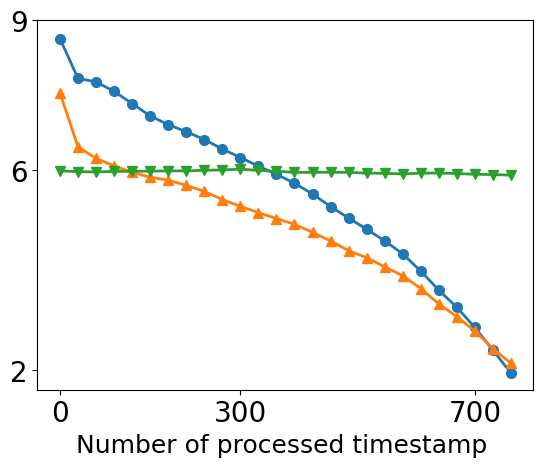

In [4]:
# plot the running rmse, with line and dots
# plt.figure(figsize=(10,10))
# plt.plot(running_rmse,'o-', label = "BayTIDE", linewidth=3,markersize=10)
# plt.plot(running_rmse_no_weight,'o-', label = "BayTIDE-no-weight",linewidth=3, markersize=10)
# plt.plot(running_rmse_trend_only,'o-', label = "BayTIDE-trend-only",linewidth=3, markersize=10)

plt.plot(running_rmse,'o-', label = "BayOTIDE", linewidth=2,markersize=7)
plt.plot(running_rmse_trend_only,'^-', label = "BayOTIDE-trend-only",linewidth=2, markersize=7)
plt.plot(running_rmse_no_weight,'v-', label = "BayOTIDE-fix-weight",linewidth=2, markersize=7)

plt.xticks(ticks=[0,10, 23],labels=[0, 300,700],fontsize=20)
plt.xlabel("Number of processed timestamp ",fontsize=18)

plt.yticks(ticks =[2,6,9],fontsize=20)
# plt.ylabel("RMSE ",fontsize=35)

# plt.legend(fontsize=20)

plt.savefig("./figs/running_rmse-uber.pdf",bbox_inches='tight')